In [1]:
# An interactive map of the red line
# Author: Katrina Deloso
# In this notebook, I will use the LA Metro API to create an interactive map of the Metro Line B, aka the Red Line. I chose the Red Line because the Hollywood/Western stop on the Red Line is within a 15 minute walk of the Ferndell entrance to Griffith Park
# I intended to show only the red line stops that are within 30 minutes of the Hollywood/Western stop, since we're capping our total travel time as 45 minutes to/from a park entrance, and there's a 15 minute walk from the station to the entrance
# However, after looking at the LA Metro timetables, I realized that Hollywood/Western is roughly in the middle of the red line, and all stops can be reached from it within 30 minutes. Because of this, I will include all red line stops


In [2]:
# First, I import my libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
# Call the LA metro API data for the red line, create a variable for it, and put it into a json file
metrorail_red = 'http://api.metro.net/agencies/lametro-rail/routes/802/stops/'
with urllib.request.urlopen(metrorail_red) as url:
    data = json.loads(url.read().decode())

# convert the data from json to a dataframe and specify that the contents will be the array called 'items'
df = pd.json_normalize(data, 'items')
df
# This dataframe shows the name, stop id, and lat/lon for all of the stops on the red line

display_name     id  latitude  \
0                     Universal / Studio City Station  80202  34.14000   
1                             North Hollywood Station  80201  34.16850   
2                            Hollywood / Vine Station  80204  34.10163   
3                            Vermont / Sunset Station  80206  34.09771   
4                          Wilshire / Vermont Station  80209  34.06270   
5                   Westlake / Macarthur Park Station  80210  34.05637   
6   7th Street / Metro Center Station - Metro Red ...  80211  34.04863   
7                   Civic Center / Grand Park Station  80213  34.05490   
8                         Hollywood / Western Station  80205  34.10174   
9                        Hollywood / Highland Station  80203  34.10155   
10                          Vermont / Beverly Station  80208  34.07653   
11                     Vermont / Santa Monica Station  80207  34.08991   
12           Union Station - Metro Red & Purple Lines  80214  34.05620   
13                            Pershing Square Station  80212  34.04932   

    longitude  
0  -118.36270  
1  -118.37681  
2  -118.32518  
3  -118.29176  
4  -118.29008  
5  -118.27488  
6  -118.25868  
7  -118.24606  
8  -118.30812  
9  -118.33855  
10 -118.29169  
11 -118.29173  
12 -118.23425  
13 -118.25126

In [4]:
# Next, I need to convert this dataframe to a geodataframe and convert the latitutde/longitude points onto geometry points
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.longitude, df.latitude))
# Then I project this geodataframe to webmercator to "flatten" it into a 2D projection
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [5]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

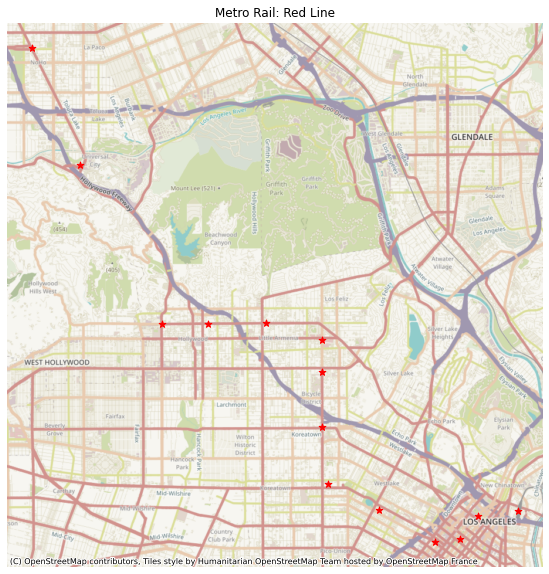

In [6]:
# Now I map it!
fig, ax = plt.subplots(figsize=(20,10))

gdf_web_mercator.plot(ax=ax, marker='*', markersize=50, color='red', edgecolor='red')

ax.axis('off')

ax.set_title('Metro Rail: Red Line')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.HOT)

In [7]:
# import metro portal data. This data is for entrances to transit stops, and it's a little too granular for what I'm trying to do right now. Saving this for later...
metroportal = gpd.read_file('RedPurpleData/Portals_RedPurple_0715.shp')
metroportal.tail()

LINENUM  STNSEQ  LINENUM2  STNSEQ2        LINE   DIR  STOPNUM  \
37      802       1       805        1  Red/Purple  None    80214   
38      805      15         0        0      Purple  None    80215   
39      805      15         0        0      Purple  None    80215   
40      805      16         0        0      Purple  None    80216   
41      805      16         0        0      Purple  None    80216   

                                     STATION PORTALNUM       PORTALNAME  RAMP  \
37  Union Station - Metro Red & Purple Lines    80214C  Vignes Entrance  None   
38              Wilshire / Normandie Station    80215A         Elevator  None   
39              Wilshire / Normandie Station    80215B    Main Entrance  None   
40                Wilshire / Western Station    80216A         Elevator  None   
41                Wilshire / Western Station    80216B    Main Entrance  None   

   STAIR ELEVATOR ESCALATOR       LAT        LON       POINT_X       POINT_Y  \
37   Yes     None       Yes  34.05540 -118.23346  6.490952e+06  1.842625e+06   
38  None      Yes      None  34.06157 -118.30098  6.470506e+06  1.844925e+06   
39   Yes     None       Yes  34.06140 -118.30091  6.470527e+06  1.844863e+06   
40  None      Yes      None  34.06191 -118.30876  6.468150e+06  1.845056e+06   
41   Yes     None       Yes  34.06216 -118.30883  6.468130e+06  1.845147e+06   

                           geometry  
37  POINT (6490951.521 1842625.428)  
38  POINT (6470506.458 1844925.171)  
39  POINT (6470527.475 1844863.242)  
40  POINT (6468150.455 1845056.050)  
41  POINT (6468129.533 1845147.095)

In [8]:
# import metro station data
metrostation = gpd.read_file('RedPurpleData/Stations_RedPurple_0715.shp')
metrostation.head()

LINE  LINENUM  LINENUM2  STNSEQ  STNSEQ2   DIR  STOPNUM  \
0  Red      802         0      14        0  None    80201   
1  Red      802         0      13        0  None    80202   
2  Red      802         0      12        0  None    80203   
3  Red      802         0      11        0  None    80204   
4  Red      802         0      10        0  None    80205   

                           STATION        LAT        LONG   TPIS_NAME  \
0          North Hollywood Station  34.168504 -118.376808        NoHo   
1  Universal / Studio City Station  34.140002 -118.362699   Univ City   
2     Hollywood / Highland Station  34.101547 -118.338549  HW/Highlnd   
3         Hollywood / Vine Station  34.101630 -118.325180     HW/Vine   
4      Hollywood / Western Station  34.101737 -118.308117    HW/Wstrn   

        POINT_X       POINT_Y                         geometry  
0  6.447686e+06  1.883918e+06  POINT (6447685.807 1883917.608)  
1  6.451916e+06  1.873530e+06  POINT (6451916.200 1873529.577)  
2  6.459177e+06  1.859510e+06  POINT (6459176.677 1859509.678)  
3  6.463224e+06  1.859527e+06  POINT (6463223.999 1859526.521)  
4  6.468390e+06  1.859549e+06  POINT (6468389.633 1859549.187)

In [9]:
# I want to isolate red line stops, so I check what the categories under 'LINE' are
metrostation['LINE']

0            Red
1            Red
2            Red
3            Red
4            Red
5            Red
6            Red
7            Red
8     Red/Purple
9     Red/Purple
10    Red/Purple
11    Red/Purple
12    Red/Purple
13    Red/Purple
14        Purple
15        Purple
Name: LINE, dtype: object

In [10]:
metrostationred = metrostation.query("LINE == 'Red' | LINE == 'Red/Purple'")
metrostationred

LINE  LINENUM  LINENUM2  STNSEQ  STNSEQ2   DIR  STOPNUM  \
0          Red      802         0      14        0  None    80201   
1          Red      802         0      13        0  None    80202   
2          Red      802         0      12        0  None    80203   
3          Red      802         0      11        0  None    80204   
4          Red      802         0      10        0  None    80205   
5          Red      802         0       9        0  None    80206   
6          Red      802         0       8        0  None    80207   
7          Red      802         0       7        0  None    80208   
8   Red/Purple      802       805       6        6  None    80209   
9   Red/Purple      802       805       5        5  None    80210   
10  Red/Purple      802       805       4        4  None    80211   
11  Red/Purple      802       805       3        3  None    80212   
12  Red/Purple      802       805       2        2  None    80213   
13  Red/Purple      802       805       1        1  None    80214   

                                              STATION        LAT        LONG  \
0                             North Hollywood Station  34.168504 -118.376808   
1                     Universal / Studio City Station  34.140002 -118.362699   
2                        Hollywood / Highland Station  34.101547 -118.338549   
3                            Hollywood / Vine Station  34.101630 -118.325180   
4                         Hollywood / Western Station  34.101737 -118.308117   
5                            Vermont / Sunset Station  34.097708 -118.291756   
6                      Vermont / Santa Monica Station  34.089910 -118.291730   
7                           Vermont / Beverly Station  34.076526 -118.291686   
8                          Wilshire / Vermont Station  34.062701 -118.290082   
9                   Westlake / MacArthur Park Station  34.056368 -118.274879   
10  7th Street / Metro Center Station - Metro Red ...  34.048634 -118.258682   
11                            Pershing Square Station  34.049316 -118.251259   
12                  Civic Center / Grand Park Station  34.054900 -118.246057   
13           Union Station - Metro Red & Purple Lines  34.056197 -118.234249   

     TPIS_NAME       POINT_X       POINT_Y                         geometry  
0         NoHo  6.447686e+06  1.883918e+06  POINT (6447685.807 1883917.608)  
1    Univ City  6.451916e+06  1.873530e+06  POINT (6451916.200 1873529.577)  
2   HW/Highlnd  6.459177e+06  1.859510e+06  POINT (6459176.677 1859509.678)  
3      HW/Vine  6.463224e+06  1.859527e+06  POINT (6463223.999 1859526.521)  
4     HW/Wstrn  6.468390e+06  1.859549e+06  POINT (6468389.633 1859549.187)  
5       Sunset  6.473338e+06  1.858068e+06  POINT (6473338.369 1858068.185)  
6     Ver/SaMo  6.473338e+06  1.855230e+06  POINT (6473338.004 1855230.335)  
7      Beverly  6.473337e+06  1.850360e+06  POINT (6473337.192 1850359.625)  
8      Wil/Ver  6.473808e+06  1.845327e+06  POINT (6473808.401 1845327.058)  
9     Westlake  6.478407e+06  1.843009e+06  POINT (6478406.678 1843009.425)  
10         7MC  6.483305e+06  1.840182e+06  POINT (6483305.444 1840181.860)  
11    Persh Sq  6.485555e+06  1.840424e+06  POINT (6485554.672 1840424.348)  
12   Civic Ctr  6.487135e+06  1.842453e+06  POINT (6487135.446 1842452.570)  
13    UnionSta  6.490713e+06  1.842916e+06  POINT (6490713.209 1842916.027)

In [11]:
# Next I want to narrow down the number of columns
metrored = metrostationred[['LINE','STATION','LAT','LONG','POINT_X','POINT_Y','geometry']].copy()
metrored

LINE                                            STATION        LAT  \
0          Red                            North Hollywood Station  34.168504   
1          Red                    Universal / Studio City Station  34.140002   
2          Red                       Hollywood / Highland Station  34.101547   
3          Red                           Hollywood / Vine Station  34.101630   
4          Red                        Hollywood / Western Station  34.101737   
5          Red                           Vermont / Sunset Station  34.097708   
6          Red                     Vermont / Santa Monica Station  34.089910   
7          Red                          Vermont / Beverly Station  34.076526   
8   Red/Purple                         Wilshire / Vermont Station  34.062701   
9   Red/Purple                  Westlake / MacArthur Park Station  34.056368   
10  Red/Purple  7th Street / Metro Center Station - Metro Red ...  34.048634   
11  Red/Purple                            Pershing Square Station  34.049316   
12  Red/Purple                  Civic Center / Grand Park Station  34.054900   
13  Red/Purple           Union Station - Metro Red & Purple Lines  34.056197   

          LONG       POINT_X       POINT_Y                         geometry  
0  -118.376808  6.447686e+06  1.883918e+06  POINT (6447685.807 1883917.608)  
1  -118.362699  6.451916e+06  1.873530e+06  POINT (6451916.200 1873529.577)  
2  -118.338549  6.459177e+06  1.859510e+06  POINT (6459176.677 1859509.678)  
3  -118.325180  6.463224e+06  1.859527e+06  POINT (6463223.999 1859526.521)  
4  -118.308117  6.468390e+06  1.859549e+06  POINT (6468389.633 1859549.187)  
5  -118.291756  6.473338e+06  1.858068e+06  POINT (6473338.369 1858068.185)  
6  -118.291730  6.473338e+06  1.855230e+06  POINT (6473338.004 1855230.335)  
7  -118.291686  6.473337e+06  1.850360e+06  POINT (6473337.192 1850359.625)  
8  -118.290082  6.473808e+06  1.845327e+06  POINT (6473808.401 1845327.058)  
9  -118.274879  6.478407e+06  1.843009e+06  POINT (6478406.678 1843009.425)  
10 -118.258682  6.483305e+06  1.840182e+06  POINT (6483305.444 1840181.860)  
11 -118.251259  6.485555e+06  1.840424e+06  POINT (6485554.672 1840424.348)  
12 -118.246057  6.487135e+06  1.842453e+06  POINT (6487135.446 1842452.570)  
13 -118.234249  6.490713e+06  1.842916e+06  POINT (6490713.209 1842916.027)

In [12]:
# Now, I want to see this map on folium
import folium

# center folium map at Hollywood/Western coordinates, since that's my area of study
mred = folium.Map(location=[34.101737, -118.308117], zoom_start=12)

# create for loop to create markers for each station
for index, row in metrored.iterrows():
    folium.Marker(
        location=[row.LAT,row.LONG], 
        tooltip=row.STATION, 
        icon=folium.Icon(color="red",icon="star"),
    ).add_to(mred)
mred

In [13]:
# Now I'm making a function to map isochrones around each transit stop
import osmnx as ox
import networkx as nx

network_type = 'walk'
trip_times = [5, 10, 15] #in minutes
meters_per_minute = 75 # travel distance per minute

In [30]:
def isomapred(gdf):
    G = ox.graph.graph_from_point(place, dist=1000, dist_type='bbox', network_type='walk')
    G = ox.project_graph(G, to_crs='epsg:3857')
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    
    minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
    centroid_x = (maxx-minx)/2 + minx
    centroid_y = (maxy-miny)/2 + miny
    
    center_node = ox.get_nearest_node(G, 
                                  (centroid_y,centroid_x), 
                                  method = 'euclidean')
    gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute
    
    iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                    cmap='viridis', 
                                    start=0, 
                                    return_hex=True)
      
    trip_times.sort(reverse=True)
    time_color = list(zip(trip_times, iso_colors))
    time_color
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
    #gdf_edges.plot(figsize=(10,10))
  
    for time, color in list(time_color):
        subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')  
        for node in subgraph.nodes():
            gdf_nodes.loc[node,'time'] = str(time) + ' mins'
            gdf_nodes.loc[node,'color'] = color
    gdf_nodes['color'].fillna('#cccccc', inplace=True)
    isochrones = gdf_nodes.dissolve('time')
    isochrones = isochrones.convex_hull.reset_index()
    isochrones.columns=['time','geometry']
    #isochrones.plot(alpha=.2)
    
    fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
    gdf_edges.plot(ax=ax,
                   linewidth=0.5,
                   alpha = .2,
                   edgecolor='gainsboro', 
                   zorder=10)

# add all nodes to ax
    gdf_nodes.plot(ax=ax, 
                   markersize=1, 
                   zorder=10)

# add the center node in red
    gdf_nodes.loc[[center_node]].plot(ax=ax,
                                      color='r', 
                                      zorder=30)
# add isochrones
    isochrones.plot(alpha=.4,
                   ax=ax,
                   column='time',
                   cmap='viridis',
                   legend=True,
                   zorder=20)

# no axis
    ax.axis('off')

# title
###you can edit where this line draws the map title from
    ax.set_title('Walk sheds around Metro Red Line Stop: ' + row['STATION'])

    
# add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

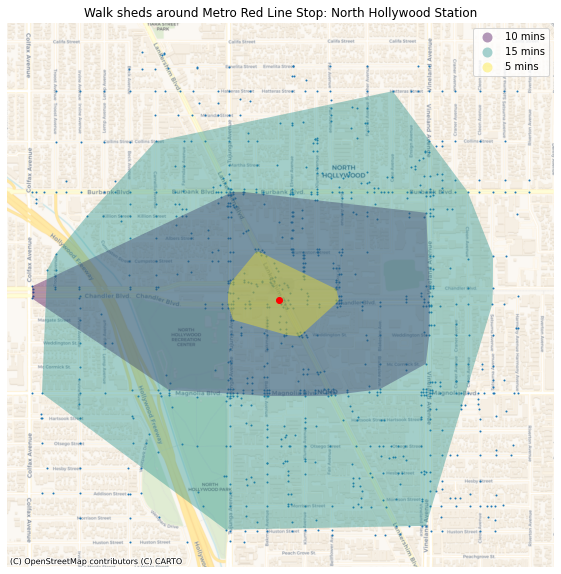

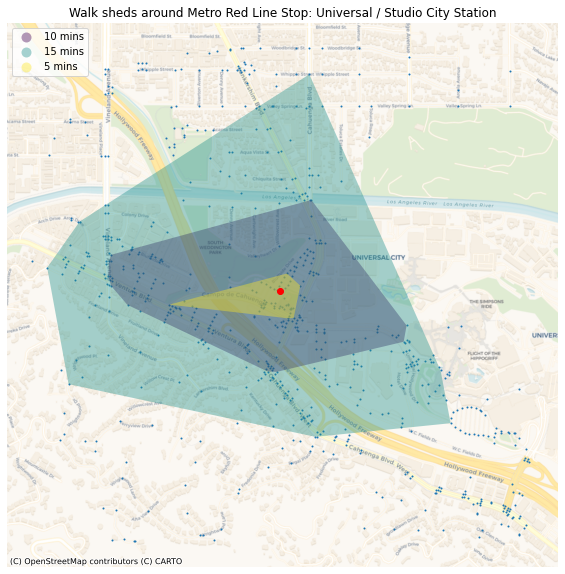

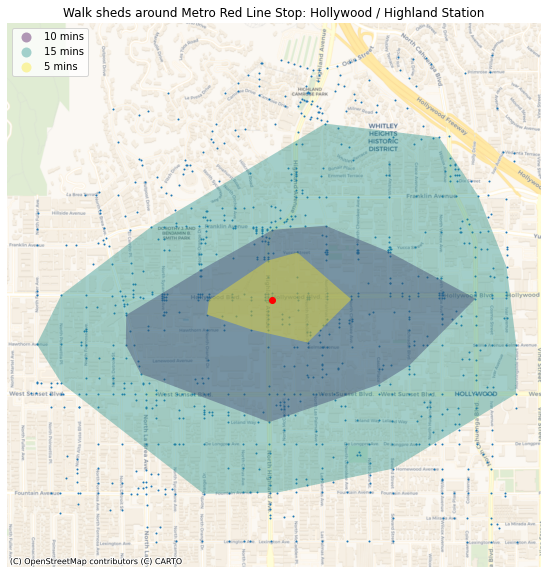

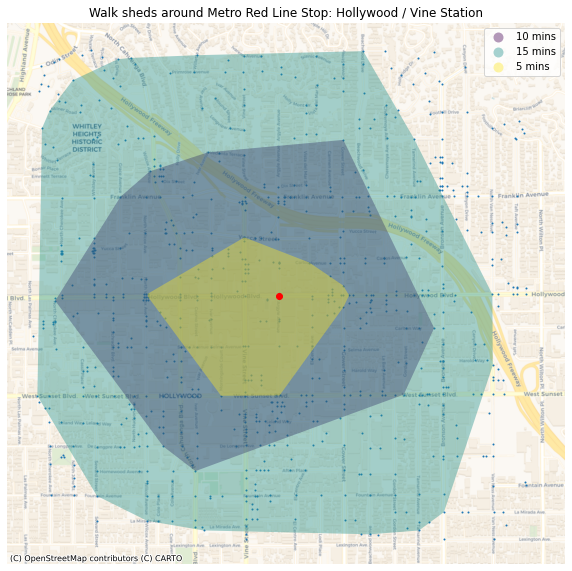

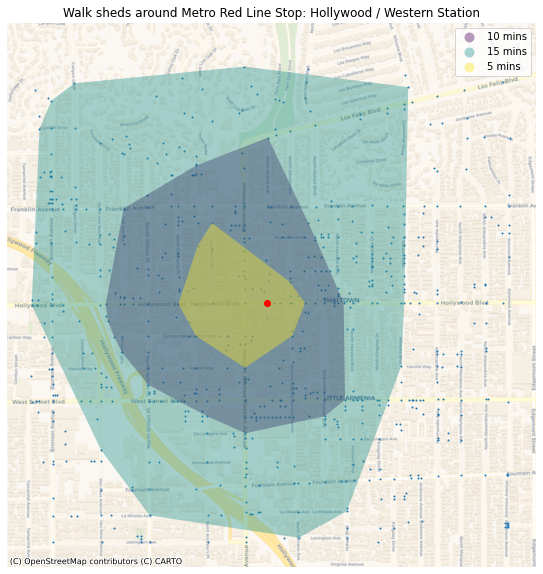

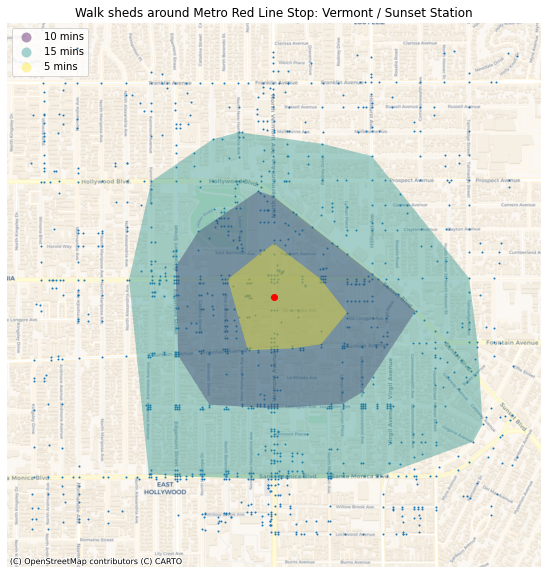

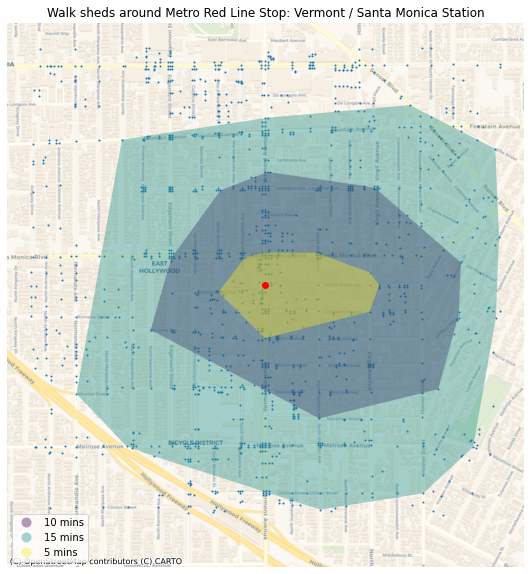

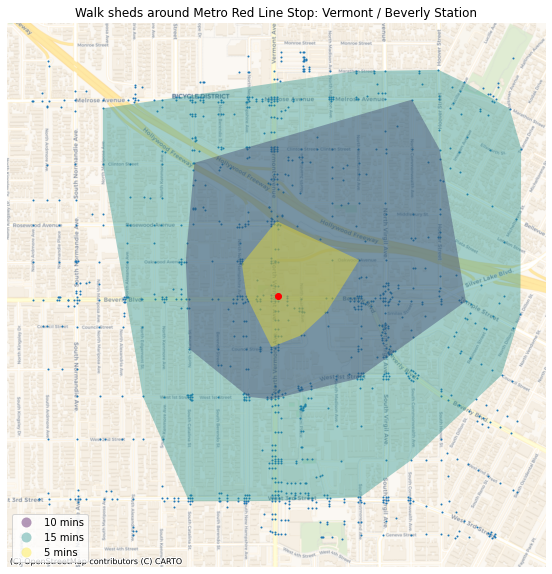

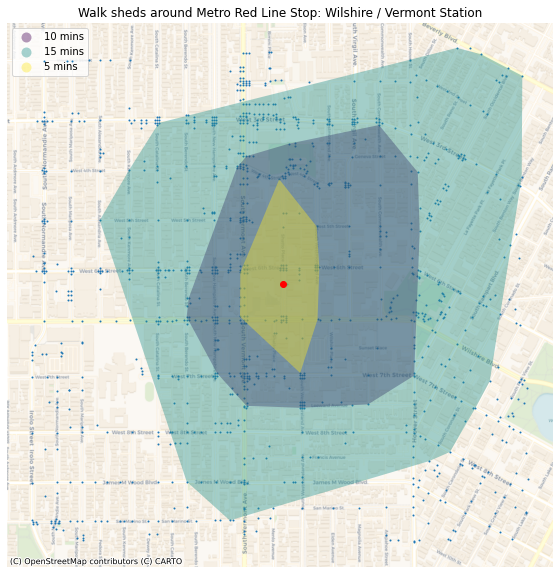

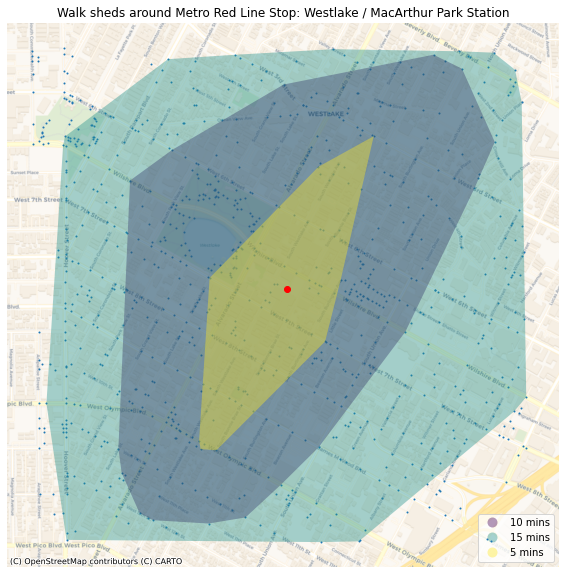

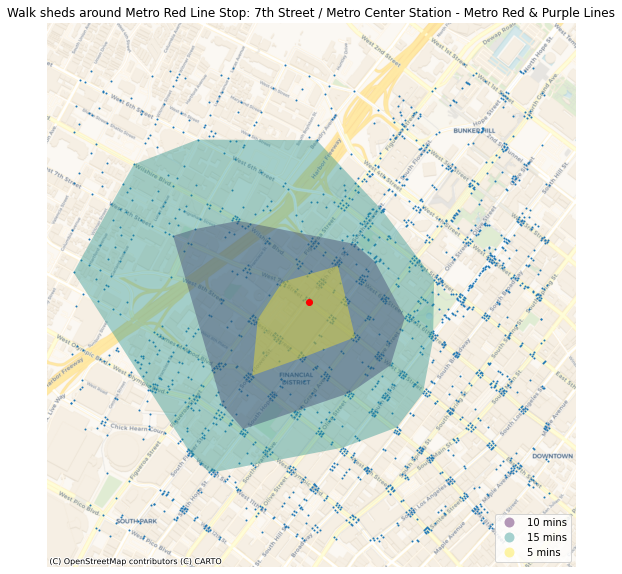

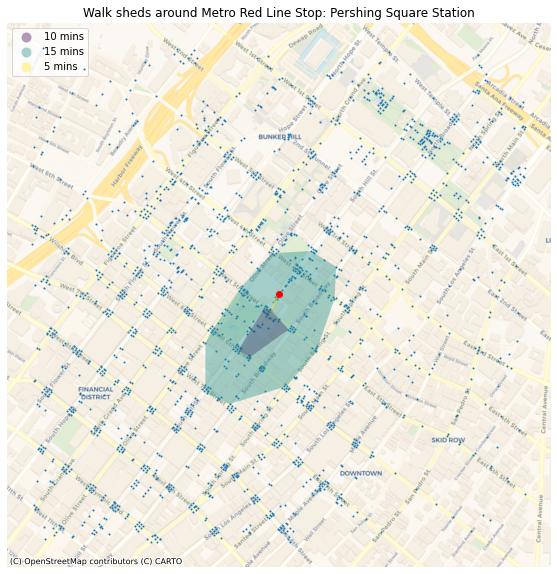

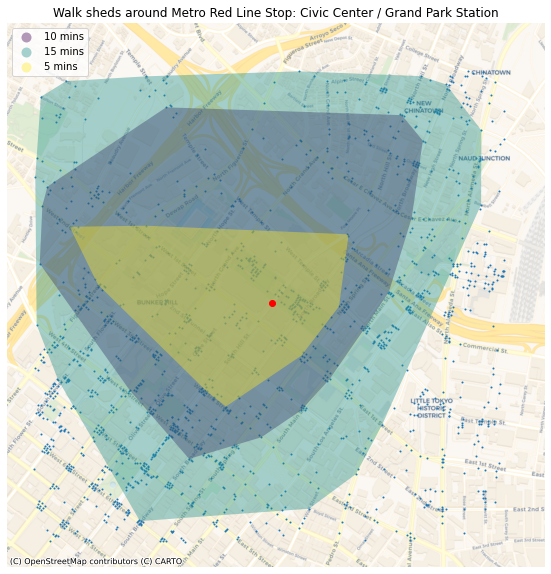

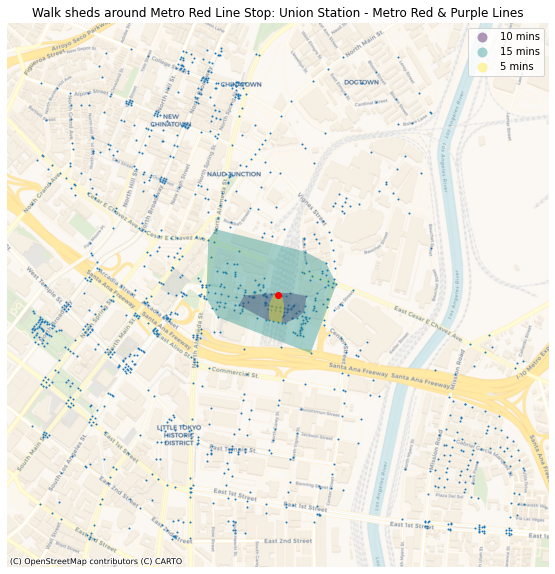

In [31]:
for index,row in metrored.iterrows():
    place = (row['LAT'],row['LONG'])
    isomapred(metrored)